In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

def import_matplotlib_style(label_size = 16):


    font = {'family' : 'monospace',
            'weight' : 'normal',
            'size'   : label_size}

    mpl.rc('font', **font)

    params = {'legend.fontsize': label_size,
              'figure.figsize': (7, 5),
              'axes.labelsize': label_size,
              'axes.titlesize':label_size,
              'xtick.labelsize':label_size,
              'ytick.labelsize':label_size}
    mpl.rcParams.update(params)

import_matplotlib_style()


In [2]:
df = pd.read_csv('optical_flares_FFD_slopes_literature.csv', dtype=str)
df

,author,slopemin,slopemax,notes,energymin,energymax,notes.1,SpT min,SpT max,nstars,nflares,Unnamed: 11
0,Hawley+2014,"1,95","2,01","min = binned, max=cumulative",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LSq with Poisson uncertainty, increase the low..."
1,Davenport2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,confidence intervals following Gehrels1986
2,Gizis+2017,"1,6",2,NaN,31,33,NaN,M7,M7,1,22,"de-biased MLE (Arnold2015), weight each point ..."
3,Paudel+2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ML from a paper in 2010, used emcee (Foreman-M..."
4,Lacy1976,"1,43",2,NaN,29,"32,5",NaN,M0,M6,8,386,graphical linear Lsq
5,Davenport+2012*,"1,9","2,1",NaN,29,31,flare luminosities instead of energies,M0,M6,51000,NaN,Fit\nlog 10 Y = α + (β log 10 X)(10 − γ/(X + δ))
6,Lurie+2015,"1,92","2,03",NaN,"30,2","33,2",Kepler band,M5,M5,2,NaN,Bayesian MCMC based algorithm from Kelly 2007 ...
7,Shakhovskaya+1989,"1,4","2,4",NaN,29,36,NaN,K0,M8,35,200,"linear representation, power laws from\nGershb..."
8,Yang+2017,"1,72","2,42",NaN,32,35,NaN,K8,M5.5,540,102187,binned FFDs
9,Howard+2018,"1,84","2,34",NaN,32,"35,5",bol,K5,M4,284,575,"fit cumulative power law, MCMC for uncertainties"


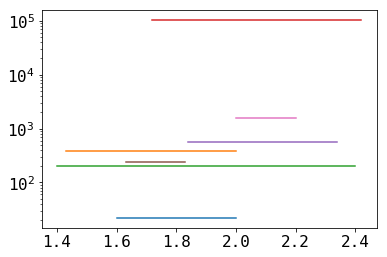

In [3]:
for label, row in df[["slopemin", "slopemax","nflares"]].dropna(how="any").iterrows():
    plt.plot([float(str(row.slopemin.replace(",","."))), float(str(row.slopemax.replace(",",".")))], [int(row.nflares)]*2)
plt.yscale("log")

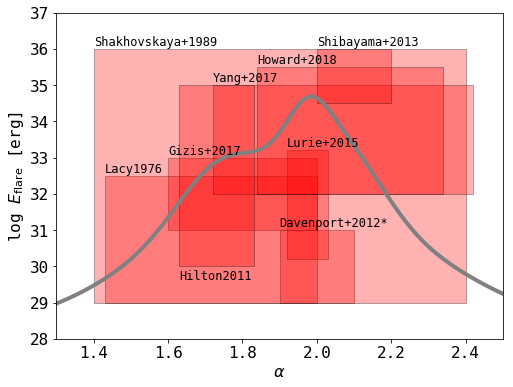

In [16]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def floatify(x):
    return float(str(x).replace(",","."))

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

fix, ax = plt.subplots(1, figsize=(8,6))
#
alphas = np.linspace(0,4,400)
g = np.zeros_like(alphas)
boxes = []
for label, row in df[["slopemin", "slopemax","energymin", "energymax","author"]].dropna(how="any").iterrows():
    mi , ma = floatify(row.slopemin), floatify(row.slopemax) 
    g = g + gaussian(alphas, (mi + ma)/2, (ma - mi)/2, )
    f = Rectangle((mi, floatify(row.energymin)),
             ma-mi,
             floatify(row.energymax) - floatify(row.energymin))
    if row.author=="Hilton2011":
        ax.text(mi, floatify(row.energymin)-0.35, row.author, fontsize=12)
    else:
        ax.text(mi, floatify(row.energymax)+0.1, row.author, fontsize=12)
    boxes.append(f)
ax.plot(alphas, 28.+g, c="grey", linewidth=4)
# Create patch collection with specified colour/alpha
pc = PatchCollection(boxes, facecolor="r", alpha=.3,
                     edgecolor="k")
ax.add_collection(pc)

plt.xlim(1.3,2.5)
plt.ylim(28,37)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"log $E_\mathrm{flare}$ [erg]")
plt.savefig("overview_alpha_literature.png", dpi=300)

In [9]:
alphas = np.linspace(0,4,400)
g = np.zeros_like(alphas)

for label, row in df[["slopemin", "slopemax","energymin", "energymax","author"]].dropna(how="any").iterrows():
    mi , ma = floatify(row.slopemin), floatify(row.slopemax) 
    g = g + gaussian(alphas, (mi + ma)/2, (ma - mi)/2, )

In [15]:
alphas[np.argmax(g)]

1.9849624060150375